In [1]:
%pylab inline

from matplotlib import animation
import datetime
from celestialbody import celestialbody
from celestialbody.celestialbody import CelestialBody
from fitting.fitting import Fit
import astropy.constants as const

def mysavefig(name):
    plt.tight_layout()
    plt.savefig("images/"+name, bbox_inches="tight", dpi=200)

Populating the interactive namespace from numpy and matplotlib


# body.data("position", start=debut, stop=fin, step=pas)

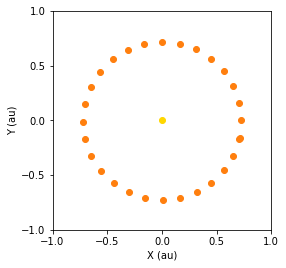

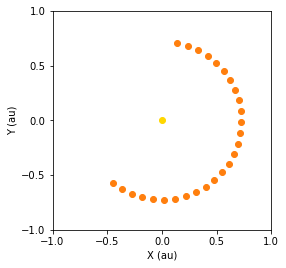

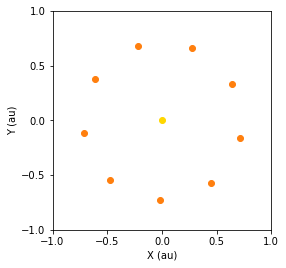

In [2]:
body = CelestialBody("Venus")

debut = datetime.datetime(2021,1,1)
fin   = datetime.datetime(2021,5,13)
pas   = 25

positions_default = body.data("position")
positions_startstop = body.data("position", start=debut, stop=fin)
positions_step = body.data("position", step=pas)

for i, positions in enumerate([positions_default, positions_startstop, positions_step]):
    fig = plt.figure(figsize=(4,4))
    sps = (1, 1)
    ax = plt.subplot2grid(sps, (0, 0))
    x, y = positions[:,0],  positions[:,1]
    ax.plot(x,y,"oC1")

    ax.plot([0], [0] ,"o", color="gold")
    ax.set_aspect("equal")
    ax.set_xlabel("X (au)")
    ax.set_ylabel("Y (au)")
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    
    ax.set_xticks([-1, -.5, 0, .5, 1])
    ax.set_yticks([-1, -.5, 0, .5, 1])
    
    mysavefig("positions_"+str(i)+".png")

# File creator

In [261]:
body = CelestialBody("Jupiter")

# Création d'un fichier jupiter.txt contenant les coordonnées cartésiennes x,y
body.data_position_txt(start=debut, stop=fin, step=pas, cols="xy")

# Kepler third law

15P/Finlay 0.72046703


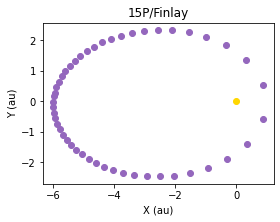

In [29]:
body = CelestialBody("Finlay", category="comet")
print(body.fullname, body.e)

debut = datetime.datetime(2018,1,1)
pas   = 50
fin   = debut + datetime.timedelta(days=body.period)

positions = body.data("position", start=debut, stop=fin, step=pas)

fig = plt.figure(figsize=(4,4))
sps = (1, 1)
ax = plt.subplot2grid(sps, (0, 0))
x, y = positions[:,0],  positions[:,1]
ax.plot(x,y,"oC4")

ax.plot([0], [0] ,"o", color="gold")
ax.set_aspect("equal")
ax.set_xlabel("X (au)")
ax.set_ylabel("Y (au)")
#ax.set_xlim(-1,1)
#ax.set_ylim(-1,1)
ax.set_title(body.fullname)
    
mysavefig("kepler_third_law_"+body.name+"_complete.png")

Value computed:
1.9818746899757038e+30 +/- 4.454118087235449e+25
1.988409870698051e+30 +/- 4.468805426856864e+25


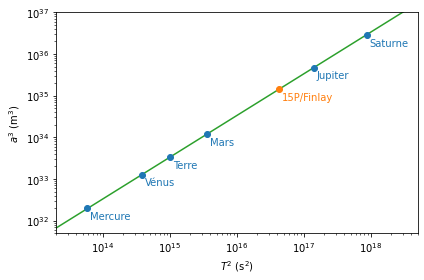

In [132]:
# fit in log scale
fig = plt.figure(figsize=(6,4))
sps = (1,1)
ax = plt.subplot2grid(sps, (0,0))

au = const.au.value

names = ["Mercure", "Vénus", "Terre", "Mars", "Jupiter", "Saturne"]
periods       = np.array([87.77, 224.70, 365.25, 686.95, 4332.62, 10759.2])*24*3600
u_periods     = np.array([.01, .01, .01, .01, .01, .1])*24*3600
semimajoraxes = np.array([0.389, 0.724, 1, 1.524, 5.2, 9.510])*au
u_semimajoraxes=np.array([.001, .001, .001, .001, .1, .001])*au

fitter = Fit("linear", x=periods**2, y=semimajoraxes**3, uy=u_semimajoraxes, ux=u_periods, verbosemode=False)
fit_params, u_params = fitter.fit()
slope, y0 = fit_params
u_slope, u_y0 = u_params

x = np.logspace(6, 10)
if True:
    ax.loglog(x**2, slope * x**2, "C2")
if True:
    for name, p, a in zip(names, periods, semimajoraxes):
        ax.annotate(name, (p**2,a**3), color="C0", textcoords="offset points", xytext=(3,-3),
                    horizontalalignment='left', verticalalignment='top', alpha=1)
    ax.loglog(periods**2, semimajoraxes**3, "oC0")

ax.loglog(np.array([body.period*24*3600])**2, np.array([body.a*au])**3, "oC1")
ax.annotate(body.fullname, ((body.period*24*3600)**2,(body.a*au)**3), color="C1", textcoords="offset points", xytext=(3,-3),
            horizontalalignment='left', verticalalignment='top', alpha=1)

ax.set_xlabel(r"$T^2$ $(\mathrm{s}^2)$")
ax.set_ylabel(r"$a^3$ $(\mathrm{m}^3)$")
ax.set_xlim(2e13, 5e18)
ax.set_ylim(5e31, 1e37)

mysavefig("kepler_third_law_3.png")

M_sun   = (4*np.pi**2*slope/const.G).value
u_M_sun_squared = ((4*np.pi**2*slope/const.G**2 * const.G.uncertainty)**2).value + ((4*np.pi**2/const.G * u_slope)**2).value

print("Value computed:")
print(M_sun, "+/-", np.sqrt(u_M_sun_squared))
print(const.M_sun.value, "+/-", const.M_sun.uncertainty)

In [116]:
const.GM_sun

<<class 'astropy.constants.iau2015.IAU2015'> name='Nominal solar mass parameter' value=1.3271244e+20 uncertainty=0.0 unit='m3 / s2' reference='IAU 2015 Resolution B 3'>

0.0